In [1]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import DecomposeResult

register_matplotlib_converters()
sns.set_style("darkgrid")

In [2]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [3]:
t = np.arange(1, 1000)
daily_seasonality = 5 * np.sin(2 * np.pi * t / 24)
weekly_seasonality = 10 * np.sin(2 * np.pi * t / (24 * 7))
trend = 0.0001 * t**2
y = trend + daily_seasonality + weekly_seasonality + np.random.randn(len(t))
ts = pd.date_range(start="2020-01-01", freq="H", periods=len(t))
df = pd.DataFrame(data=y, index=ts, columns=["y"])

In [4]:
df.head()

,y
2020-01-01 00:00:00,1.063672
2020-01-01 01:00:00,4.947784
2020-01-01 02:00:00,4.322479
2020-01-01 03:00:00,6.350312
2020-01-01 04:00:00,4.710730


<AxesSubplot: >

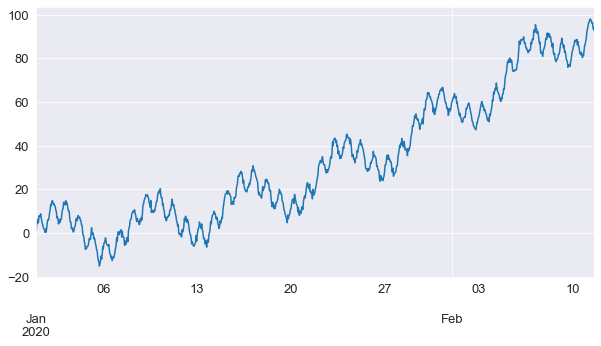

In [5]:
df["y"].plot(figsize=[10, 5])

In [6]:
mstl = MSTL(df["y"], periods=[24, 24 * 7])
res = mstl.fit()

In [7]:
res.seasonal.head()

,seasonal_24,seasonal_168
2020-01-01 00:00:00,0.713083,1.738599
2020-01-01 01:00:00,2.927223,2.199683
2020-01-01 02:00:00,3.287666,1.404065
2020-01-01 03:00:00,4.608193,1.848903
2020-01-01 04:00:00,3.697855,1.559228


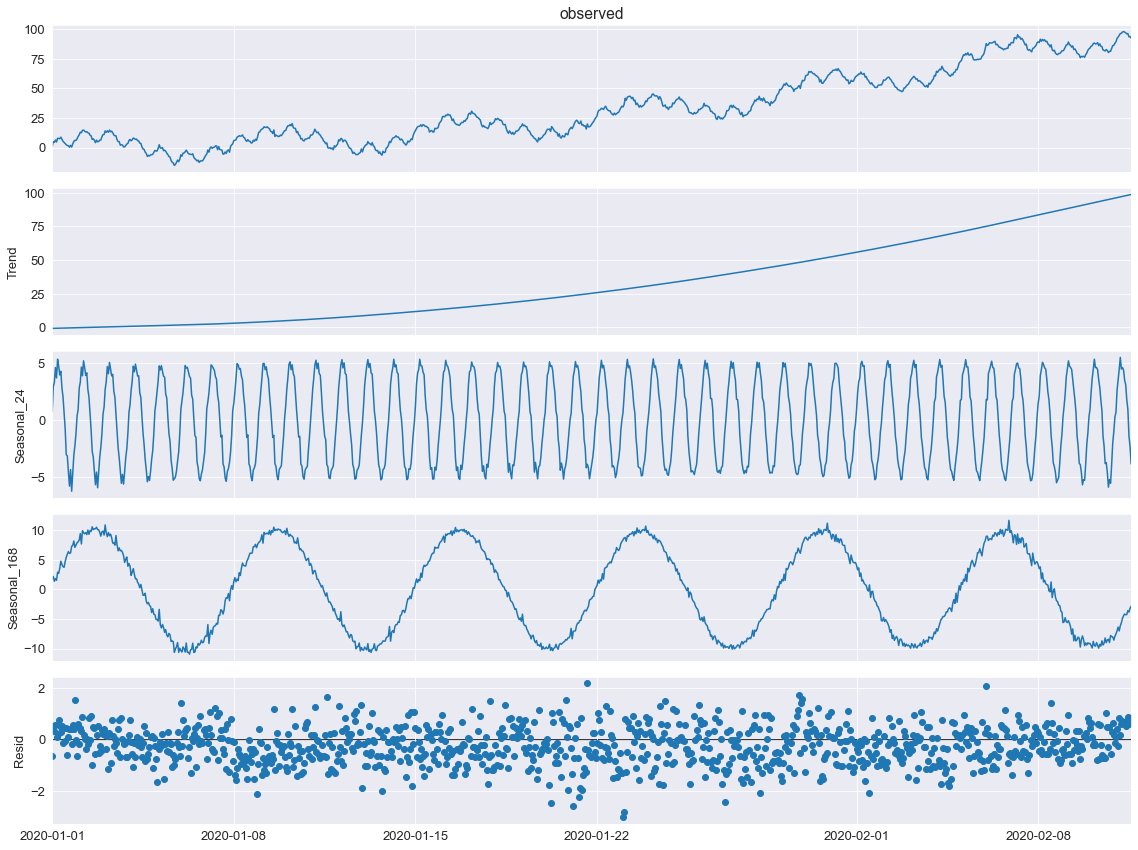

In [8]:
ax = res.plot()

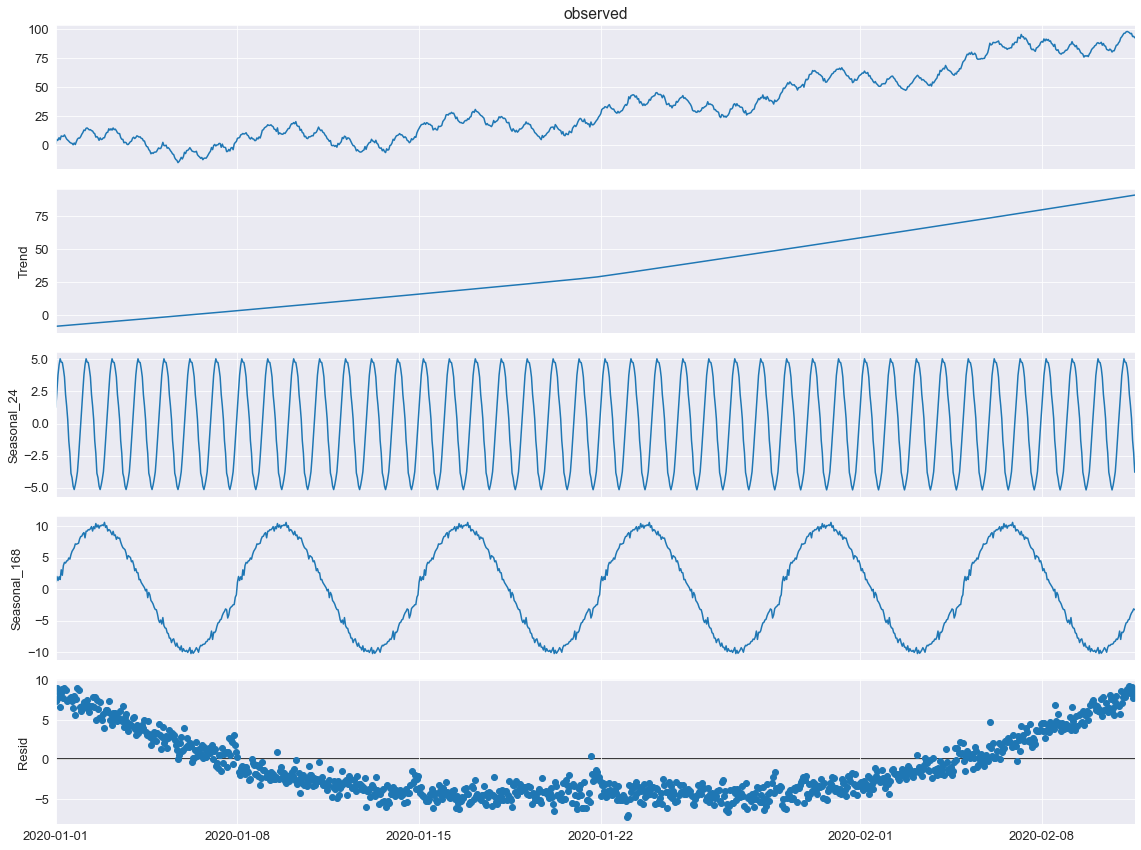

In [9]:
mstl = MSTL(
    df,
    periods=[24, 24 * 7],  # The periods and windows must be the same length and will correspond to one another.
    windows=[101, 101],  # Setting this large along with `seasonal_deg=0` will force the seasonality to be periodic.
    iterate=3,
    stl_kwargs={
                "trend":1001, # Setting this large will force the trend to be smoother.
                "seasonal_deg":0, # Means the seasonal smoother is fit with a moving average.
               }
)
res = mstl.fit()
ax = res.plot()
